# Housing project DA

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('E:/datasets/housing_dataset.csv')

In [3]:
data.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN


In [4]:
data[data.duplicated()]

,date,area,average_price,code,houses_sold,no_of_crimes


In [5]:
data.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

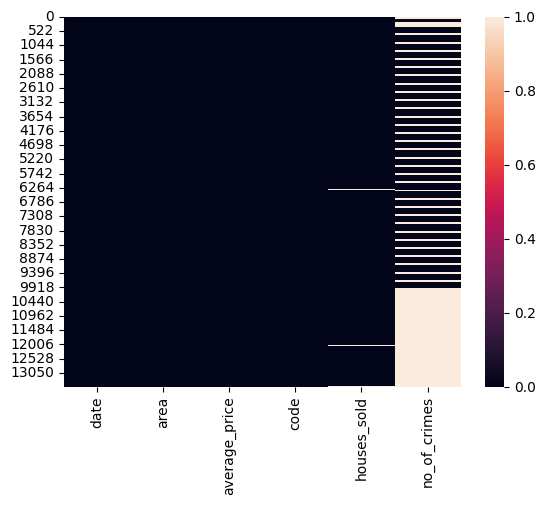

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull())
plt.show

**Convert the Datatype of 'Date' column to Date-Time format.**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [23]:
data.date = pd.to_datetime(data.date)


In [33]:
data.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

In [32]:
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


**Q. 2) Add a new column ''year'' in the dataframe, which contains years only.**

In [34]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day


In [35]:
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,year,month,day
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995,1,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995,2,1


**(2.B) Add a new column ''month'' as 2nd column in the dataframe, which contains month only.**

In [36]:
data.insert(1,'Month',data.date.dt.month)

In [37]:
data.head(2)

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year,month,day
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995,1,1
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995,2,1


**Remove the columns 'year' and 'month' from the dataframe.**

In [42]:
new=data.drop(['year','month'],axis=1)

In [43]:
new.head(2)

,date,Month,area,average_price,code,houses_sold,no_of_crimes,day
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1


**4) Show all the records where 'No. of Crimes' is 0. And, how many such records are there ?**

In [44]:
data[data.no_of_crimes==0]

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year,month,day
72,2001-01-01,1,city of london,284262,E09000001,24.0,0.0,2001,1,1
73,2001-02-01,2,city of london,198137,E09000001,37.0,0.0,2001,2,1
74,2001-03-01,3,city of london,189033,E09000001,44.0,0.0,2001,3,1
75,2001-04-01,4,city of london,205494,E09000001,38.0,0.0,2001,4,1
76,2001-05-01,5,city of london,223459,E09000001,30.0,0.0,2001,5,1
...,...,...,...,...,...,...,...,...,...,...
178,2009-11-01,11,city of london,397909,E09000001,11.0,0.0,2009,11,1
179,2009-12-01,12,city of london,411955,E09000001,16.0,0.0,2009,12,1
180,2010-01-01,1,city of london,464436,E09000001,20.0,0.0,2010,1,1
181,2010-02-01,2,city of london,490525,E09000001,9.0,0.0,2010,2,1


In [46]:
len(data[data.no_of_crimes==0])

104

**Q. 5) What is the maximum & minimum 'average_price' per year in england ?**

In [47]:
df1=data[data.area =='england']

In [54]:
df1.head(3)

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year,month,day
13248,1995-01-01,1,england,53203,E92000001,47639.0,NaN,1995,1,1
13249,1995-02-01,2,england,53096,E92000001,47880.0,NaN,1995,2,1
13250,1995-03-01,3,england,53201,E92000001,67025.0,NaN,1995,3,1


In [52]:
df1.groupby('year').average_price.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1995,12.0,53322.416667,373.548210,52788.0,53052.50,53256.0,53619.50,53901.0
1996,12.0,54151.500000,1199.646804,52333.0,53169.00,54398.5,55046.25,55755.0
1997,12.0,59160.666667,2137.956728,55789.0,57378.75,59614.5,61005.25,61564.0
1998,12.0,64301.666667,1558.265897,61659.0,63312.75,65001.0,65500.00,65743.0
1999,12.0,70070.750000,3370.946404,65522.0,67330.50,70020.0,72930.25,75071.0
2000,12.0,80814.333333,3265.159674,75219.0,78980.25,81916.0,83514.50,84191.0
2001,12.0,90306.750000,4266.146998,84245.0,86889.75,90705.0,93801.75,95992.0
2002,12.0,107981.500000,8470.434587,96215.0,100756.75,108406.0,114405.25,119982.0
2003,12.0,130218.583333,6052.596324,121610.0,125493.75,130835.5,134393.25,138985.0


In [57]:
df1.groupby('year').average_price.max().head(3)

year
1995    53901
1996    55755
1997    61564
Name: average_price, dtype: int64

In [58]:
df1=data[data.area =='england']
df1.groupby('year').average_price.describe().head(3)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1995,12.0,53322.416667,373.548210,52788.0,53052.50,53256.0,53619.50,53901.0
1996,12.0,54151.500000,1199.646804,52333.0,53169.00,54398.5,55046.25,55755.0
1997,12.0,59160.666667,2137.956728,55789.0,57378.75,59614.5,61005.25,61564.0


**6) What is the Maximum & Minimum No. of Crimes recorded per area ?**

In [59]:
data.head(2)

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year,month,day
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995,1,1
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995,2,1


In [61]:
data.groupby('area').no_of_crimes.describe()

,count,mean,std,min,25%,50%,75%,max
area,,,,,,,,
barking and dagenham,229.0,1599.275109,168.661912,1217.0,1473.0,1608.0,1716.0,2049.0
barnet,229.0,2278.441048,263.464539,1703.0,2092.0,2242.0,2438.0,2893.0
bexley,229.0,1299.458515,235.618436,860.0,1097.0,1299.0,1491.0,1914.0
brent,229.0,2415.602620,245.738404,1850.0,2217.0,2433.0,2607.0,2937.0
bromley,229.0,2020.131004,283.961235,1441.0,1793.0,1989.0,2252.0,2637.0
camden,229.0,3056.572052,529.999810,2079.0,2611.0,2976.0,3414.0,4558.0
city of london,111.0,0.423423,1.719141,0.0,0.0,0.0,0.0,10.0
croydon,229.0,2652.943231,236.289651,2031.0,2512.0,2643.0,2803.0,3263.0
ealing,229.0,2607.061135,293.148764,1871.0,2392.0,2625.0,2833.0,3401.0


In [62]:
data.groupby('area').no_of_crimes.max()

area
barking and dagenham      2049.0
barnet                    2893.0
bexley                    1914.0
brent                     2937.0
bromley                   2637.0
camden                    4558.0
city of london              10.0
croydon                   3263.0
ealing                    3401.0
east midlands                NaN
east of england              NaN
enfield                   2798.0
england                      NaN
greenwich                 2853.0
hackney                   3466.0
hammersmith and fulham    2645.0
haringey                  3199.0
harrow                    1763.0
havering                  1956.0
hillingdon                2819.0
hounslow                  2817.0
inner london                 NaN
islington                 3384.0
kensington and chelsea    2778.0
kingston upon thames      1379.0
lambeth                   4701.0
lewisham                  2813.0
london                       NaN
merton                    1623.0
newham                    3668.0
north

**Show the total count of records of each area, where average price is less than 100000.**

In [70]:
df2=data[data.average_price<100000]

In [73]:
df2.groupby('area').count()

,date,Month,average_price,code,houses_sold,no_of_crimes,year,month,day
area,,,,,,,,,
barking and dagenham,85,85,85,85,85,13,85,85,85
barnet,25,25,25,25,25,0,25,25,25
bexley,64,64,64,64,64,0,64,64,64
brent,40,40,40,40,40,0,40,40,40
bromley,33,33,33,33,33,0,33,33,33
city of london,11,11,11,11,11,0,11,11,11
croydon,57,57,57,57,57,0,57,57,57
ealing,31,31,31,31,31,0,31,31,31
east midlands,96,96,96,96,96,0,96,96,96


In [74]:
data[data.average_price<100000].area.value_counts()

area
north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
sutton                   54
enfield                  54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
hounslow                 41
lambeth                  41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
ealing                   31
inner london             31
harrow                   30
kingston upon t